In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
271145,164432.0,1.983275,-0.822835,-0.300133,0.540774,-0.828389,0.426715,-1.093265,0.222711,-0.208969,...,-0.064879,0.411711,0.188577,0.656935,-0.139933,-0.535128,0.077013,-0.028589,24.0,0


In [4]:
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [8]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
legit_sample = legit.sample(n=492)


In [13]:
new_df = pd.concat([legit_sample,fraud],axis=0)


In [14]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213593,139316.0,-0.760538,1.191394,-0.181757,-0.695385,0.066760,-0.846852,0.513400,0.370793,-0.172568,...,-0.180928,-0.473293,0.187897,-0.001286,-0.480332,0.118276,0.105020,0.074773,10.78,0
131459,79608.0,-2.775030,-1.023774,-2.707685,-0.127714,-7.536286,2.951302,7.498213,-0.506176,-0.677355,...,0.003601,0.208674,1.489040,0.483326,-0.174067,0.862418,0.666498,-0.441333,1741.26,0
67934,52756.0,1.087736,-0.224562,-0.512973,-0.915739,-0.201509,-1.315170,0.623676,-0.399797,0.319742,...,0.146225,0.328094,-0.309185,0.399737,0.903364,-0.486691,-0.009560,0.018978,113.91,0
89191,62468.0,-0.517493,0.826563,0.811917,-0.102301,1.149607,-0.175053,0.737673,-0.052556,-0.424828,...,0.118364,0.355665,-0.280789,-0.741436,0.126849,-0.463532,-0.048377,0.054531,2.00,0
260913,159774.0,-0.972653,0.353228,1.823506,-0.938925,0.681418,-0.607281,1.000772,-0.151859,-0.371442,...,0.009387,-0.002382,-0.336588,0.080858,0.615364,0.211699,-0.222636,-0.182442,39.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [16]:
new_df.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94269.410569,0.035063,0.110471,0.041061,0.131238,0.078477,0.041311,0.105673,-0.005485,0.001110,...,0.048193,-0.014855,0.021265,0.019448,-0.039129,0.037860,-0.010081,0.016618,0.012544,87.816606
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [19]:
model=LogisticRegression()

In [20]:
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9529860228716646


C:\Users\Sowmi sunder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9086294416243654


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate legitimate and fraudulent transactions
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

# Undersample legitimate transactions to balance the classes
legit_sample = legit.sample(n=len(fraud), random_state=2)
data_balanced = pd.concat([legit_sample, fraud], axis=0)

# Split data into features and target
X = data_balanced.drop(columns="Class", axis=1)
y = data_balanced["Class"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Calculate accuracy on training and testing data
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy: {test_acc}")


Training Accuracy: 0.9529860228716646
Testing Accuracy: 0.9289340101522843


C:\Users\Sowmi sunder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import streamlit as st
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('creditcard.csv')

# Separate legitimate and fraudulent transactions
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

# Undersample legitimate transactions to balance the classes
legit_sample = legit.sample(n=len(fraud), random_state=2)
data = pd.concat([legit_sample, fraud], axis=0)

# Split data into training and testing sets
X = data.drop(columns="Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model performance
train_acc = accuracy_score(model.predict(X_train), y_train)
test_acc = accuracy_score(model.predict(X_test), y_test)

# Create accuracy graph
st.subheader("Model Accuracy")
accuracies = [train_acc, test_acc]
labels = ['Training Accuracy', 'Testing Accuracy']

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.grid(axis='y')

# Display the plot in Streamlit
st.pyplot(plt)

# Create Streamlit app
st.title("Credit Card Fraud Detection Model")
st.write("Enter the following features to check if the transaction is legitimate or fraudulent:")

# Create input fields for user to enter feature values
input_df = st.text_input('Input All features (comma-separated):')

# Create a button to submit input and get prediction
submit = st.button("Submit")

if submit:
    if not input_df:
        st.error("Input is empty. Please provide the feature values.")
    else:
        try:
            # Split and convert the input to a list of floats
            input_values = [float(i.strip()) for i in input_df.split(',')]
            # Check if the input length matches the model's expected number of features
            if len(input_values) != X_train.shape[1]:
                st.error(f"Incorrect number of inputs. Expected {X_train.shape[1]} feature values.")
            else:
                # Reshape the input and make prediction
                features = np.array(input_values).reshape(1, -1)
                prediction = model.predict(features)
                # Output prediction result
                if prediction[0] == 0:
                    st.success("LEGITIMATE TRANSACTION")
                else:
                    st.warning("FRAUD TRANSACTION")
        except ValueError:
            st.error("Invalid input. Please ensure all inputs are valid numbers.")


C:\Users\Sowmi sunder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024-09-28 16:15:27.457 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-28 16:15:27.457 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-28 16:15:27.482 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-28 16:15:27.671 Thread 'MainThread': missing ScriptRunContext! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('creditcard.csv')


C:\Users\Sowmi sunder\AppData\Local\Temp\ipykernel_22588\1157351295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='pastel')


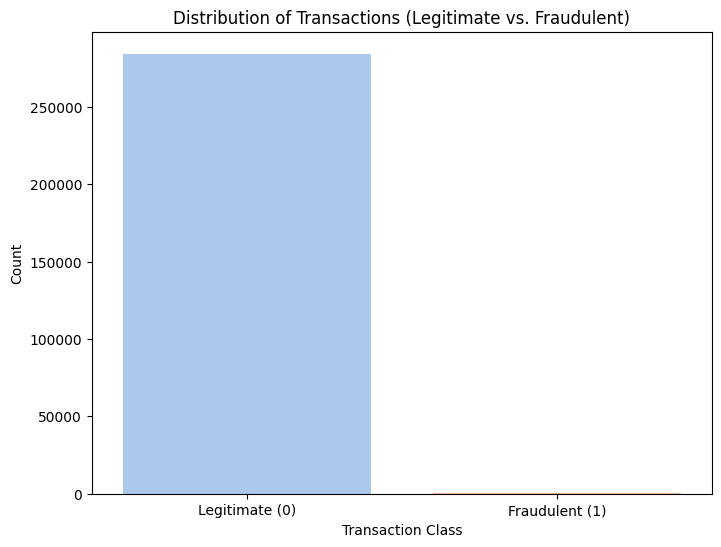

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='pastel')
plt.title('Distribution of Transactions (Legitimate vs. Fraudulent)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.show()


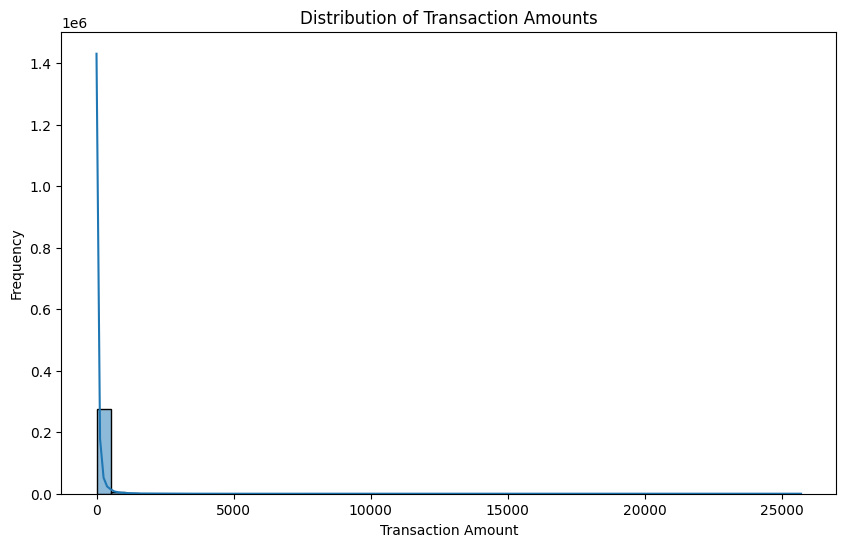

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


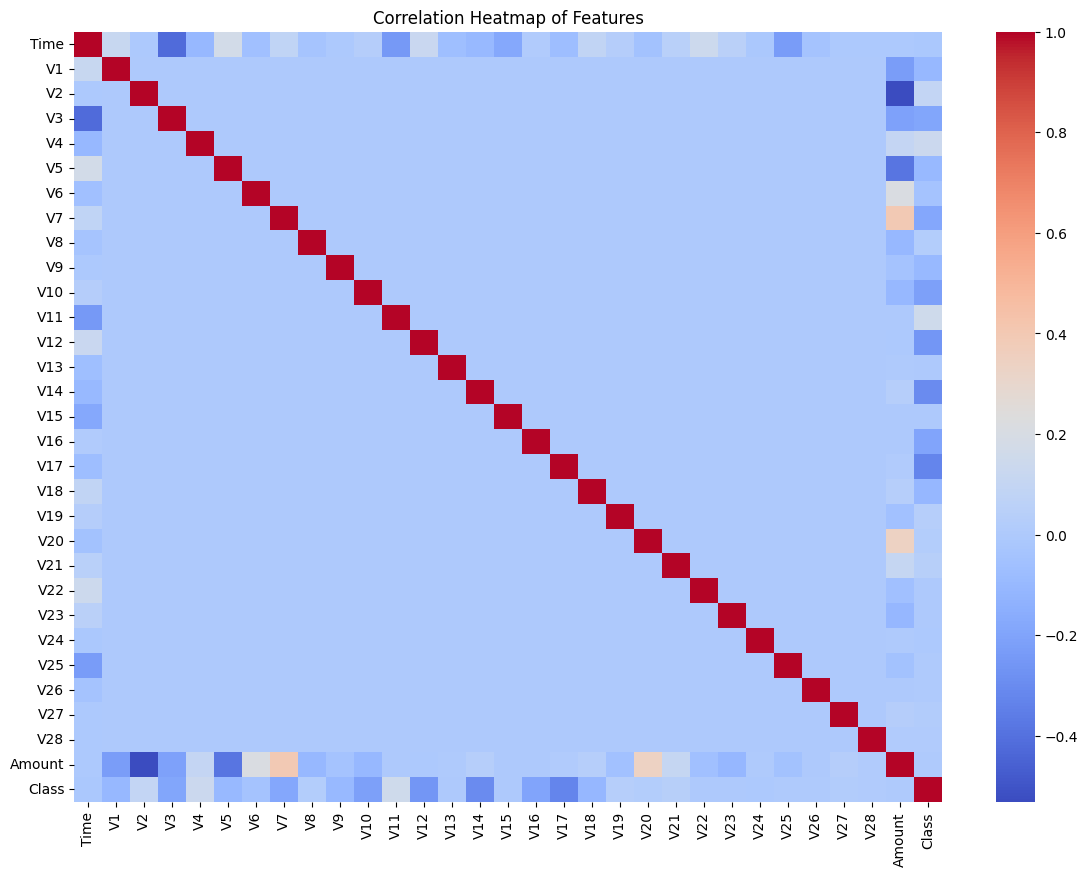

In [5]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


In [6]:
import streamlit as st

# After creating the plot
st.pyplot()


2024-09-28 18:03:39.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-28 18:03:40.407 
  command:

    streamlit run C:\Users\Sowmi sunder\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-28 18:03:40.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-28 18:03:40.414 
Calling `st.pyplot()` without providing a figure argument has been deprecated
and will be removed in a later version as it requires the use of Matplotlib's
global figure object, which is not thread-safe.

To future-proof this code, you should pass in a figure as shown below:

```python
fig, ax = plt.subplots()
ax.scatter([1, 2, 3], [1, 2, 3])
# other plotting actions...
st.pyplot(fig)
```

If you have a specific use case that requires this functionality, please let us
know via [issue on Github](https://github.com/streamlit/streamlit/issues).

2024-

DeltaGenerator()

In [7]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')  # Assuming 'Time' is in seconds


In [8]:
data['Date'] = data['Time'].dt.date  # Extract the date


In [9]:
data['Date'] = data['Time'].dt.date  # Extract the date


In [10]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=daily_fraud.index, y=daily_fraud.values, marker='o')
plt.title('Daily Count of Fraudulent Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid()
plt.show()


NameError: name 'daily_fraud' is not defined

In [11]:
plt.axhline(y=daily_fraud.mean(), color='r', linestyle='--', label='Average Fraud Level')
plt.legend()


NameError: name 'daily_fraud' is not defined

In [12]:
daily_fraud_rolling = daily_fraud.rolling(window=7).mean()  # 7-day moving average
sns.lineplot(x=daily_fraud.index, y=daily_fraud_rolling, label='7-Day Moving Average', color='orange')


NameError: name 'daily_fraud' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

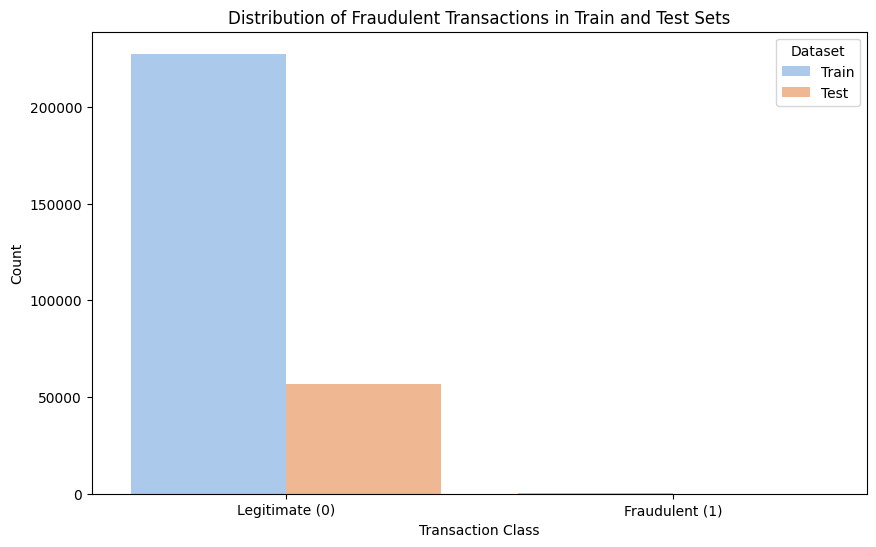

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and target variable
X = data.drop(columns='Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Create a DataFrame for the train-test split distribution
train_distribution = pd.DataFrame({'Class': y_train})
test_distribution = pd.DataFrame({'Class': y_test})

# Combine train and test distributions for comparison
train_distribution['Set'] = 'Train'
test_distribution['Set'] = 'Test'
combined_distribution = pd.concat([train_distribution, test_distribution])

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_distribution, x='Class', hue='Set', palette='pastel')
plt.title('Distribution of Fraudulent Transactions in Train and Test Sets')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.legend(title='Dataset', loc='upper right')
plt.show()
